**Import libraries**

In [594]:
import numpy as np
import pandas as pd
import datetime
import matplotlib.pyplot as plt

**Read in a Pandas DataFRame**

In [595]:
df = pd.read_csv("covid19.csv")

**Converts dates to a specific format**

In [596]:
df['Date'] = pd.to_datetime(df['Date'], format = '%d-%m-%Y')
df = df.set_index(pd.DatetimeIndex(df['Date']))

**Drops unnecessary column(s)**

In [597]:
df.drop(['State/UnionTerritory','Sno','Date'],axis=1,inplace=True)

**Checking the general information**

In [598]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 270 entries, 2020-01-30 to 2020-03-21
Data columns (total 4 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   ConfirmedIndianNational   270 non-null    int64
 1   ConfirmedForeignNational  270 non-null    int64
 2   Cured                     270 non-null    int64
 3   Deaths                    270 non-null    int64
dtypes: int64(4)
memory usage: 10.5 KB


**Peeking into the data**

In [599]:
df.head()

,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths
Date,,,,
2020-01-30,1,0,0,0
2020-01-31,1,0,0,0
2020-02-01,2,0,0,0
2020-02-02,3,0,0,0
2020-02-03,3,0,0,0


**Grouping the data**

In [600]:
sc = df.groupby(['Date']).agg({'ConfirmedIndianNational':'sum','ConfirmedForeignNational':'sum','Cured':'sum','Deaths':'sum'}).reset_index()
sc

,Date,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths
0,2020-01-30,1,0,0,0
1,2020-01-31,1,0,0,0
2,2020-02-01,2,0,0,0
3,2020-02-02,3,0,0,0
4,2020-02-03,3,0,0,0
5,2020-02-04,3,0,0,0
6,2020-02-05,3,0,0,0
7,2020-02-06,3,0,0,0
8,2020-02-07,3,0,0,0
9,2020-02-08,3,0,0,0


**adding coloumn**

In [601]:
sc.sum()

ConfirmedIndianNational     1499
ConfirmedForeignNational     359
Cured                        163
Deaths                        25
dtype: int64

In [602]:
sc['Total_cases'] = (sc['ConfirmedIndianNational'] + sc['ConfirmedForeignNational']+ sc['Cured'] + sc['Deaths'])
sc.reset_index()

,index,Date,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Total_cases
0,0,2020-01-30,1,0,0,0,1
1,1,2020-01-31,1,0,0,0,1
2,2,2020-02-01,2,0,0,0,2
3,3,2020-02-02,3,0,0,0,3
4,4,2020-02-03,3,0,0,0,3
5,5,2020-02-04,3,0,0,0,3
6,6,2020-02-05,3,0,0,0,3
7,7,2020-02-06,3,0,0,0,3
8,8,2020-02-07,3,0,0,0,3
9,9,2020-02-08,3,0,0,0,3


In [603]:
sc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 6 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Date                      52 non-null     datetime64[ns]
 1   ConfirmedIndianNational   52 non-null     int64         
 2   ConfirmedForeignNational  52 non-null     int64         
 3   Cured                     52 non-null     int64         
 4   Deaths                    52 non-null     int64         
 5   Total_cases               52 non-null     int64         
dtypes: datetime64[ns](1), int64(5)
memory usage: 2.6 KB


In [604]:
date = pd.date_range('2020-01-30', '2020-03-21', freq='D').to_series() 
X = date.dt.day

In [605]:
sc['date'] = (sc.index - sc.index[0]); sc

,Date,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Total_cases,date
0,2020-01-30,1,0,0,0,1,0
1,2020-01-31,1,0,0,0,1,1
2,2020-02-01,2,0,0,0,2,2
3,2020-02-02,3,0,0,0,3,3
4,2020-02-03,3,0,0,0,3,4
5,2020-02-04,3,0,0,0,3,5
6,2020-02-05,3,0,0,0,3,6
7,2020-02-06,3,0,0,0,3,7
8,2020-02-07,3,0,0,0,3,8
9,2020-02-08,3,0,0,0,3,9


In [612]:
x = sc['date'].values.reshape(-1,1)
y = sc['Total_cases'].values

In [607]:
print(x)

[[ 0]
 [ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]
 [11]
 [12]
 [13]
 [14]
 [15]
 [16]
 [17]
 [18]
 [19]
 [20]
 [21]
 [22]
 [23]
 [24]
 [25]
 [26]
 [27]
 [28]
 [29]
 [30]
 [31]
 [32]
 [33]
 [34]
 [35]
 [36]
 [37]
 [38]
 [39]
 [40]
 [41]
 [42]
 [43]
 [44]
 [45]
 [46]
 [47]
 [48]
 [49]
 [50]
 [51]]


In [613]:
print(y)

[  1   1   2   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3
   3   3   3   3   3   3   3   3   3   3   3   3   3   3   5   9  31  33
  34  37  42  49  61  63  77  85  96 125 129 154 168 197 250 310]


**Ploting Graphs**

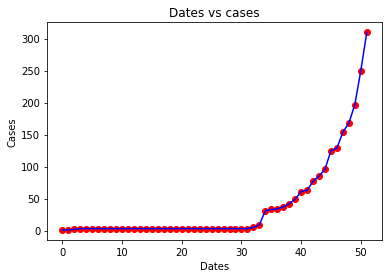

In [614]:
plt.scatter(x, Total_cases, color = 'red')
plt.plot(x, Total_cases, color = 'blue')
plt.title('Dates vs cases')
plt.xlabel('Dates')
plt.ylabel('Cases')
plt.show()

In [616]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

In [625]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

**predicting Linear regression**

In [628]:
regressor.predict([[51]])

array([138.93])

**Predicting multi linear regression**

In [630]:
y_pred = regressor.predict(X_test)
np.set_printoptions(precision=1)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[ 53.1   3. ]
 [ 86.7  37. ]
 [-10.4   3. ]
 [ 75.5  31. ]
 [-44.    2. ]
 [ 60.5   3. ]
 [ 97.9  61. ]
 [ 68.    5. ]
 [ 45.6   3. ]
 [-36.5   3. ]
 [-14.1   3. ]]


**Training the Polynomial Regression model on the whole dataset**

In [632]:
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree = 4)
X_poly = poly_reg.fit_transform(x)
lin_reg_2 = LinearRegression()
lin_reg_2.fit(X_poly, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

**Visualising the Polynomial Regression results**

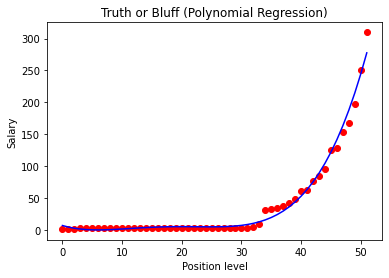

In [633]:
plt.scatter(x, y, color = 'red')
plt.plot(x, lin_reg_2.predict(poly_reg.fit_transform(x)), color = 'blue')
plt.title('Truth or Bluff (Polynomial Regression)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

**Visualising the Polynomial Regression results (for higher resolution and smoother curve)**

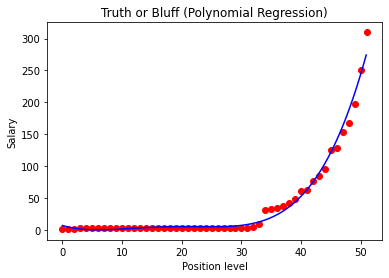

In [634]:
X_grid = np.arange(min(x), max(x), 0.1)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(x, y, color = 'red')
plt.plot(X_grid, lin_reg_2.predict(poly_reg.fit_transform(X_grid)), color = 'blue')
plt.title('Truth or Bluff (Polynomial Regression)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

In [637]:
regressor.predict([[6]])

array([-29.1])

In [642]:
lin_reg_2.predict(poly_reg.fit_transform([[6]]))

array([-0.1])